# Australian Temperature and Precipitation Change in CMIP6 SenarioMIP

In this notebook we demonstrate how to calculate the temperature and precipitation change in Australia using CMIP6 SenarioMIP prediction under two emission scenarios:

* Use xarray to open CMIP6 data
* Extract useful variables
* Calculate yearly average data
* Plot the temperature and precipitation change in Australia under two different future scenarios
* Compare the temperature and precipitation difference between the two scenarios

This example uses Coupled Model Intercomparison Project (CMIP6) collections. For more information, please visit [data catalogue]( https://geonetwork.nci.org.au/geonetwork/srv/eng/catalog.search#/metadata/f5194_5909_8003_9216) and [terms of use]( https://pcmdi.llnl.gov/CMIP6/TermsOfUse/TermsOfUse6-1.html).

---

- Authors: NCI Virtual Research Environment Team
- Keywords: CMIP, Xarray, temperature, precipitation
- Create Date: 2020-Apr
---

### Load Library

In [1]:
import xarray as xr
%matplotlib inline

### About data

In CMIP6 data collection, there are four future scenarios in ScenarioMIP: ssp126, ssp245, ssp370 and ssp585. See more information about [ScenarioMIP scenarios](https://www.geosci-model-dev.net/9/3461/2016/)

Below, we have set up these attributes in order to get the future projection data under the ssp126 and ssp585 scenarios using member 'r1i1p1f2' of CNRM_CM6-1 model simulations as an example. 

### Define CMIP data searching criterion

In [3]:
Cmip6Dir='/g/data/oi10/replicas/CMIP6'
Activity='ScenarioMIP'
Institute='CNRM-CERFACS'
Source='CNRM-CM6-1'
Experiment='' #leave it blank for later assignment
Member='r1i1p1f2'
Table='Amon'
Var=''  #leave it blank for later assignment
Grid='gr'
Version='v20190219'
Period='201501-210012'

### Australian temperature change under the lowest emission scenarios

Use xarray to open the temperature data (tas) of the lowest emission scenario (ssp126)

In [4]:
Var='tas'
Experiment='ssp126'
ds=xr.open_dataset(''+Cmip6Dir+'/'+Activity+'/'+Institute+'/'+Source+'/'+Experiment+'/'+Member+'/'+Table+'/'+Var+'/'+Grid+'/'+Version+'/'+Var+'_'+Table+'_'+Source+'_'+Experiment+'_'+Member+'_'+Grid+'_'+Period+'.nc')

Extract temperature 'tas' data

In [5]:
tas_126=ds.tas

Calculate regional mean of Australia (lon: 115E-155E, lat: 45S-15S), and then calculate the yearly average of the monthly data.

In [6]:
tas_126_yr=tas_126.sel(lon=slice(115,155),lat=slice(-45,-15)).mean(dim=('lat','lon')).resample(time='Y').mean(dim='time')

/g/data/dk92/packages/xarray/core/common.py:1124: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  freq=freq, closed=closed, label=label, base=base, loffset=loffset


Plot the yearly temperature change during the time period 2019-2060

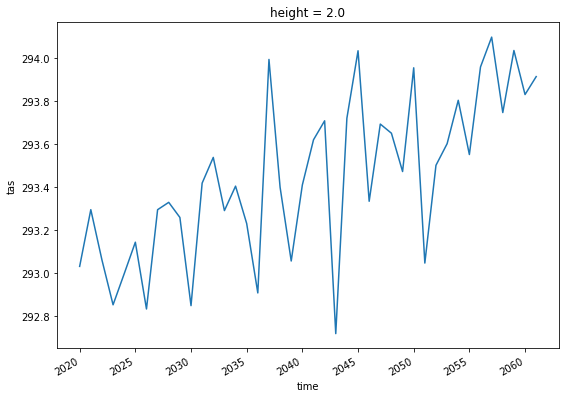

In [7]:
tas_126_yr.sel(time=slice('2019','2060')).plot(size=6)

### Australian temperature change under the highest emission scenario

Similarly as above, the yearly temperature change under the highest emission scenario (ssp585) during the time period 2019-2060 is below:

/g/data/dk92/packages/xarray/core/common.py:1124: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  freq=freq, closed=closed, label=label, base=base, loffset=loffset


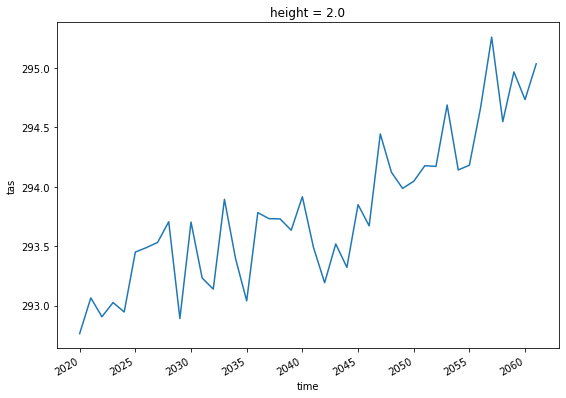

In [8]:
Experiment='ssp585'
ds=xr.open_dataset(''+Cmip6Dir+'/'+Activity+'/'+Institute+'/'+Source+'/'+Experiment+'/'+Member+'/'+Table+'/'+Var+'/'+Grid+'/'+Version+'/'+Var+'_'+Table+'_'+Source+'_'+Experiment+'_'+Member+'_'+Grid+'_201501-210012.nc')
tas_585=ds.tas
tas_585_yr=tas_585.sel(lon=slice(115,155),lat=slice(-45,-15)).mean(dim=('lat','lon')).resample(time='Y').mean(dim='time')
tas_585_yr.sel(time=slice('2019','2060')).plot(size=6)

### The difference of temperature change between the two emission scenarios

The average temperature change difference between the lowest and highest emission scenario from 2019 to 2060:

In [9]:
TasDif=tas_585_yr.mean(dim='time')-tas_126_yr.mean(dim='time')
print(TasDif)

<xarray.DataArray 'tas' ()>
array(1.4142151, dtype=float32)
Coordinates:
    height   float64 2.0


The above result shows that Australian temperature would have an additional 1.41 Celsius average warming in our lifetime span (2019-2060) under the highest emission scenario compared with the lowest emission scenario!

### How about the precipitation change under the lowest emission scenario?

/g/data/dk92/packages/xarray/core/common.py:1124: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  freq=freq, closed=closed, label=label, base=base, loffset=loffset


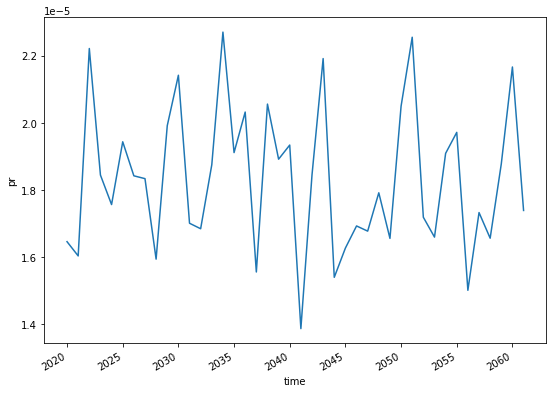

In [10]:
Var='pr'
Experiment='ssp126'
ds=xr.open_dataset(''+Cmip6Dir+'/'+Activity+'/'+Institute+'/'+Source+'/'+Experiment+'/'+Member+'/'+Table+'/'+Var+'/'+Grid+'/'+Version+'/'+Var+'_'+Table+'_'+Source+'_'+Experiment+'_'+Member+'_'+Grid+'_201501-210012.nc')
pr_126=ds.pr
pr_126_yr=pr_126.sel(lon=slice(115,155),lat=slice(-45,-15)).mean(dim=('lat','lon')).resample(time='Y').mean(dim='time')
pr_126_yr.sel(time=slice('2019','2060')).plot(size=6)

### Australian precipitation change under the highest emission scenario

/g/data/dk92/packages/xarray/core/common.py:1124: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  freq=freq, closed=closed, label=label, base=base, loffset=loffset


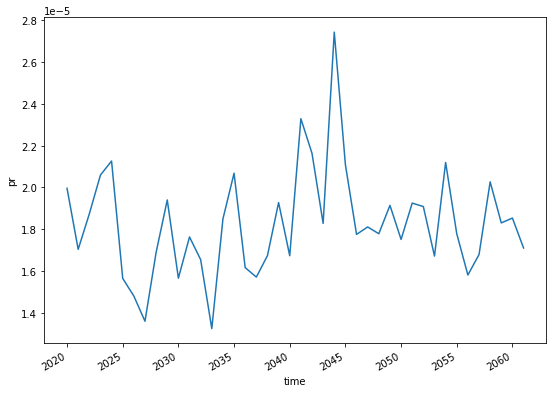

In [11]:
Var='pr'
Experiment='ssp585'
ds=xr.open_dataset(''+Cmip6Dir+'/'+Activity+'/'+Institute+'/'+Source+'/'+Experiment+'/'+Member+'/'+Table+'/'+Var+'/'+Grid+'/'+Version+'/'+Var+'_'+Table+'_'+Source+'_'+Experiment+'_'+Member+'_'+Grid+'_201501-210012.nc')
pr_585=ds.pr
pr_585_yr=pr_585.sel(lon=slice(115,155),lat=slice(-45,-15)).mean(dim=('lat','lon')).resample(time='Y').mean(dim='time')
pr_585_yr.sel(time=slice('2019','2060')).plot(size=6)

### The difference of precipitation change between the two emission scenarios

In [12]:
PrDif=(pr_585_yr.mean(dim='time')-pr_126_yr.mean(dim='time'))/pr_126_yr.mean(dim='time')
print(PrDif)

<xarray.DataArray 'pr' ()>
array(-0.02813326, dtype=float32)


This shows that on average Australia is becoming drier under a higher emission scenario.

### Summary

This example shows how to use xarray to open CMIP6 dataset, extract useful variables from the dataset, calculate yearly average and do some arithmetic and plotting.

## Reference

http://xarray.pydata.org/en/stable/